In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet 
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#enter correct file location for file "ET CLASSIFICATION FOR NLP"

global df
df = pd.read_excel (r'ET CLASSIFICATION FOR NLP', index_col=0)
pass
df.dtypes

Summary                                                                 object
Nr                                                                       int64
links                                                                   object
links-href                                                              object
country                                                                 object
date                                                                    object
fine                                                                    object
controller/processor                                                    object
sector                                                                  object
articlegdpr                                                             object
type                                                                    object
Digital loss of data                                                    object
Insufficient measures to effectively combat attacks/

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 764 entries, nan to nan
Data columns (total 47 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Summary                                                               434 non-null    object
 1   Nr                                                                    764 non-null    int64 
 2   links                                                                 764 non-null    object
 3   links-href                                                            764 non-null    object
 4   country                                                               764 non-null    object
 5   date                                                                  764 non-null    object
 6   fine                                                                  764 non-null    object
 7   cont

In [4]:
#create new data frame that isolate only 'technical' related rows
df2 = df.loc[df['technical'] == "X"]
# print(df[['links', 'country', 'date', 'fine', 'controller/processor', 'sector', 'type']])
# print(df2.iloc[0:4])
print(df2)

                                               Summary   Nr     links  \
NaN  A fine of 1000 BGN (or roughly 500 EUR) was im...    6    ETid-6   
NaN  Repeated registration of prepaid services with...    7    ETid-7   
NaN  A bank gained personal data concernign a stude...    8    ETid-8   
NaN  A patient complained to the Commissioner that ...   10   ETid-10   
NaN  Data was not processed in a manner that ensure...   14   ETid-14   
..                                                 ...  ...       ...   
NaN  The Spanish DPA (AEPD) imposed a fine on Vodaf...  849  ETid-849   
NaN  The Spanish DPA (AEPD) imposed a fine on Vodaf...  850  ETid-850   
NaN   The Norwegian DPA has fined Ferde AS, a Norwe...  851  ETid-851   
NaN   The Spanish DPA (AEPD) imposed a fine on Voda...  852  ETid-852   
NaN   The Spanish DPA (AEPD) imposed a fine on Voda...  853  ETid-853   

                                            links-href         country  \
NaN          https://www.enforcementtracker.com/E

In [5]:
# count words

comments =" ".join(df2['Summary'])
words =word_tokenize(comments)

In [6]:
comments

"A fine of 1000 BGN (or roughly 500 EUR) was imposed on a bank for calling a client for the unresolved bills of his neighbor. This provoked the client to evoke his right to be forgotten. After not receiving any answer from the bank he filed another motion, for which the bank did take action in the statutory period. Nonetheless, the client filed a complaint to KZLD. The infringement for which the bank was fined was for the processing of the client’s personal data was not linked to his consumer credit agreement. Since the purpose for which the data were processed was different from that communicated at the time of conclusion of the contract, the bank had, in the point of view of KZLD, to request additional consent from its client. Repeated registration of prepaid services without the knowledge and consent of the data subject Employees of the telecommunications provider have used personal data and registered the complainant with the company's prepaid service. The data subject had not sign

In [7]:
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
sw_nltk.extend(['data', 'personal', 'fine', 'company', 'purpose', 'fined', 'breach', 'violation', 'technical', 'subject', 'subjects', 'measures', 'organizational', 'number', 'authority', 'security', 'dpa', 'eur', 'information', 'gdpr', 'subject', 'processing', 'controller', 'art', 'due', 'also', 'without', 'aepd', 'found', 'addition', 'processed', 'spanish', 'protection', 'municipality', 'however', 'could', 'italian', 'party', 'imposed'])
print(len(sw_nltk))

218


In [9]:
# clean the words of punctuations, stop words and lemmatize the words
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in sw_nltk]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    ps = PorterStemmer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    new_tokens = [ps.stem(t) for t in new_tokens]
    return new_tokens

In [10]:
lowered = clean_words(words)

In [11]:
bow = Counter(lowered)
bow

Counter({'bgn': 1,
         'roughli': 1,
         'bank': 59,
         'call': 92,
         'client': 16,
         'unresolv': 1,
         'bill': 5,
         'neighbor': 3,
         'provok': 1,
         'evok': 1,
         'right': 34,
         'forgotten': 1,
         'receiv': 87,
         'answer': 9,
         'file': 47,
         'anoth': 33,
         'motion': 1,
         'take': 48,
         'action': 6,
         'statutori': 2,
         'period': 34,
         'nonetheless': 1,
         'complaint': 53,
         'kzld': 4,
         'infring': 9,
         'link': 13,
         'consum': 5,
         'credit': 27,
         'agreement': 7,
         'sinc': 28,
         'differ': 9,
         'commun': 22,
         'time': 60,
         'conclus': 4,
         'contract': 70,
         'point': 5,
         'view': 13,
         'request': 84,
         'addit': 8,
         'consent': 87,
         'repeat': 3,
         'registr': 11,
         'prepaid': 3,
         'servic': 53,
         '

In [12]:
data = pd.DataFrame(bow.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

In [13]:
print(data.iloc[0:50])

          word  frequency
70      access        194
48         use        116
139     custom        104
145     system         98
47      provid         94
3         call         92
293     websit         87
12      receiv         87
39     consent         87
68     patient         85
37     request         84
111     record         83
109       name         80
345    contain         80
75    investig         79
45     employe         79
272       fail         77
59      person         77
218    address         77
79       ensur         77
90       adequ         74
493     violat         73
141   document         71
34    contract         70
194     health         68
175     result         67
102     report         61
32        time         60
274     accord         60
2         bank         59
189       user         59
398       oper         59
54       legal         58
168    account         58
107   principl         55
304     garant         54
121   individu         54
81      incl

In [14]:
data[['word', 'frequency']]

,word,frequency
70,access,194
48,use,116
139,custom,104
145,system,98
47,provid,94
...,...,...
1357,android,1
1358,team,1
1360,uppsalahem,1
1363,disturb,1


In [15]:
data.to_csv('gdprenforcementtrackerexportfulllist.csv')

In [16]:
data = data.head(20)

In [17]:
dataall = df.head(3)

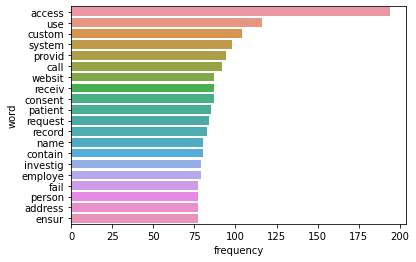

In [18]:
sns.barplot(x='frequency', y='word', data=data)
plt.savefig('saving-a-seaborn-plot-as-pdf-file-300dpi.pdf', 
           bbox_inches='tight')